In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classifieddata/Classified Data


In [27]:
import seaborn as ab
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
classified = pd.read_csv("../input/classifieddata/Classified Data")

In [29]:
classified.head(2)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [30]:
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()

In [31]:
scaler.fit(classified.drop('TARGET CLASS',axis=1))

StandardScaler()

In [32]:
scaled_features = scaler.transform(classified.drop('TARGET CLASS',axis=1))

In [33]:
classified_feat = pd.DataFrame(scaled_features,columns=classified.columns[:-1])

In [34]:
classified_feat.head(2)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


# Training Data

In [35]:
from sklearn.model_selection import train_test_split as tts


In [36]:
x = classified_feat
y=classified['TARGET CLASS']

In [37]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.4,random_state=101)

In [38]:
from sklearn.neighbors import KNeighborsClassifier as KNC


In [39]:
from sklearn.metrics import classification_report as clReport, confusion_matrix as cMat

In [40]:
errRate=[]
for i in range(1,40):
    knn=KNC(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    errRate.append(np.mean(pred_i!=ytest))

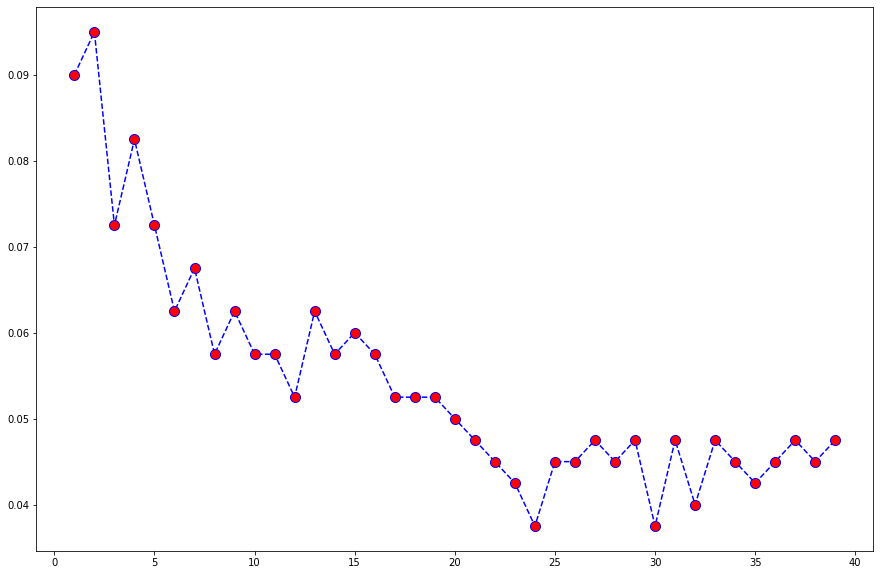

In [41]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),errRate,color="blue",linestyle='dashed',marker='o',markerfacecolor="red",markersize=10)

In [47]:
knn=KNC(n_neighbors=30)
knn.fit(xtrain,ytrain)
pred_i=knn.predict(xtest)
print(clReport(ytest,pred))
print(cMat(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       204
           1       0.92      0.89      0.91       196

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

[[189  15]
 [ 21 175]]
